# Import thư viện

In [1]:
import os
import numpy as np
import pandas as pd
from utils import *

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.metrics import euclidean_distances
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin

import matplotlib.pyplot as plt
from sklearn import set_config
set_config(display='diagram')

# Đọc dữ liệu

In [2]:
path_to_data = '../data'
path_track = os.path.join(path_to_data, '20210824_212829_tracks.tsv')
path_playlist = os.path.join(path_to_data, '20210824_212829_playlists.tsv')
path_audio =  os.path.join(path_to_data, '20210824_212829_audios.tsv')
path_artist =  os.path.join(path_to_data, '20210824_212829_artists.tsv')

In [3]:
pd_track = pd.read_csv(path_track, sep='\t')
pd_audio = pd.read_csv(path_audio, sep='\t')
pd_playlist = pd.read_csv(path_playlist, sep='\t')
pd_artist = pd.read_csv(path_artist, sep='\t')

In [4]:
pd_audio

,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,5HCyWlXZPP0y6Gqq8TgA20,0.591,0.764,1,-5.484,1,0.0483,0.0383,0.000000,0.1030,0.478,169.928,4
1,27NovPIUIRrOZoCHxABJwK,0.736,0.704,3,-7.409,0,0.0615,0.0203,0.000000,0.0501,0.894,149.995,4
2,3Vi5XqYrmQgOYBajMWSvCi,0.664,0.609,1,-6.509,1,0.0707,0.3040,0.000000,0.0926,0.194,130.041,4
3,6PQ88X9TkUIAUIZJHW2upE,0.808,0.897,11,-3.712,0,0.0348,0.0469,0.000031,0.3640,0.591,126.026,4
4,3Wrjm47oTz2sjIgck11l5e,0.714,0.800,11,-4.808,0,0.0504,0.1270,0.000000,0.3590,0.589,134.002,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69866,3Zuf70897YkrVRAsrBMMSF,0.751,0.753,0,-8.198,1,0.0935,0.2270,0.000784,0.2090,0.774,106.976,4
69867,1MDoll6jK4rrk2BcFRP5i7,0.471,0.431,5,-6.129,0,0.0342,0.3290,0.000000,0.0854,0.289,157.980,4
69868,7DqTaelFf846rl1CHmyfOW,0.506,0.433,2,-14.183,0,0.0345,0.8420,0.031100,0.1120,0.641,83.222,4
69869,0ygTmpa6uSotkBkTiwcMZ4,0.493,0.590,0,-5.814,0,0.0392,0.3390,0.000000,0.1210,0.502,169.908,4


In [5]:
pd_audio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69871 entries, 0 to 69870
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                69871 non-null  object 
 1   danceability      69871 non-null  float64
 2   energy            69871 non-null  float64
 3   key               69871 non-null  int64  
 4   loudness          69871 non-null  float64
 5   mode              69871 non-null  int64  
 6   speechiness       69871 non-null  float64
 7   acousticness      69871 non-null  float64
 8   instrumentalness  69871 non-null  float64
 9   liveness          69871 non-null  float64
 10  valence           69871 non-null  float64
 11  tempo             69871 non-null  float64
 12  time_signature    69871 non-null  int64  
dtypes: float64(9), int64(3), object(1)
memory usage: 6.9+ MB


In [6]:
pd_track

,playlist_id,track_id,track_name,track_duration,artist_ids,artist_names,album_id,album_name,popularity
0,37i9dQZF1DXcBWIGoYBM5M,5HCyWlXZPP0y6Gqq8TgA20,STAY (with Justin Bieber),141805,"['2tIP7SsRs7vjIcLrU85W8J', '1uNFoZAHBGtllmzznp...","['The Kid LAROI', 'Justin Bieber']",4QLAtpLNUsHEYrcHXmMIZZ,STAY (with Justin Bieber),100
1,37i9dQZF1DXcBWIGoYBM5M,27NovPIUIRrOZoCHxABJwK,INDUSTRY BABY (feat. Jack Harlow),212000,"['7jVv8c5Fj3E9VhNjxT4snq', '2LIk90788K0zvyj2JJ...","['Lil Nas X', 'Jack Harlow']",622NFw5Yk0OReMJ2XWcXUh,INDUSTRY BABY (feat. Jack Harlow),97
2,37i9dQZF1DXcBWIGoYBM5M,3Vi5XqYrmQgOYBajMWSvCi,Need To Know,210560,['5cj0lLjcoR7YOSnhnX0Po5'],['Doja Cat'],1nAQbHeOWTfQzbOoFrvndW,Planet Her,92
3,37i9dQZF1DXcBWIGoYBM5M,6PQ88X9TkUIAUIZJHW2upE,Bad Habits,231041,['6eUKZXaKkcviH0Ku9w2n3V'],['Ed Sheeran'],01NhUvviMytvV12pmJiDZH,Bad Habits,98
4,37i9dQZF1DXcBWIGoYBM5M,3Wrjm47oTz2sjIgck11l5e,Beggin',211560,['0lAWpj5szCSwM4rUMHYmrr'],['Måneskin'],2qJw6w5XwQO0PQlSWPu7Tw,Chosen,99
...,...,...,...,...,...,...,...,...,...
88814,4lgseztVwmKQ8MNETPVIny,5kqIPrATaCc2LqxVWzQGbk,7 Years,237300,['25u4wHJWxCA9vO0CzxAbK7'],['Lukas Graham'],4rFrdkSWs0dtj0rWPzOk1v,Lukas Graham,79
88815,4lgseztVwmKQ8MNETPVIny,3FCto7hnn1shUyZL42YgfO,Piano Man,336093,['6zFYqv1mOsgBRQbae3JJ9e'],['Billy Joel'],7r36rel1M4gyBavfcJP6Yz,The Essential Billy Joel,66
88816,4lgseztVwmKQ8MNETPVIny,3XVBdLihbNbxUwZosxcGuJ,If I Ain't Got You,228706,['3DiDSECUqqY1AuBP8qtaIa'],['Alicia Keys'],6TqRKHLjDu5QZuC8u5Woij,The Diary Of Alicia Keys,78
88817,4lgseztVwmKQ8MNETPVIny,6QPKYGnAW9QozVz2dSWqRg,Someone Like You,285240,['4dpARuHxo51G3z768sgnrY'],['Adele'],7n3QJc7TBOxXtlYh4Ssll8,21,13


In [7]:
pd_track.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88819 entries, 0 to 88818
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   playlist_id     88819 non-null  object
 1   track_id        88819 non-null  object
 2   track_name      88812 non-null  object
 3   track_duration  88819 non-null  int64 
 4   artist_ids      88819 non-null  object
 5   artist_names    88819 non-null  object
 6   album_id        88819 non-null  object
 7   album_name      88811 non-null  object
 8   popularity      88819 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 6.1+ MB


In [8]:
pd_playlist

,playlist_id,playlist_name,playlist_description,playlist_num_tracks,playlist_num_followers
0,37i9dQZF1DXcBWIGoYBM5M,Today's Top Hits,Doja Cat is on top of the Hottest 50!,50,29379379
1,37i9dQZF1DX0XUsuxWHRQd,RapCaviar,"New music from Young Thug, Trippie Redd, Rod W...",50,14030878
2,37i9dQZF1DX1lVhptIYRda,Hot Country,"Today's top country hits of the week, worldwid...",53,6475778
3,37i9dQZF1DX10zKzsJ2jva,¡Viva Latino!,"Today's top Latin hits are right here, on ¡Viv...",50,11218997
4,37i9dQZF1DX4JAvHpjipBk,New Music Friday,"New music from Lorde, Young Thug, Ed Sheeran, ...",100,3788318
...,...,...,...,...,...
1390,37i9dQZF1DX3WvGXE8FqYX,Women of Pop,Kick back with the queens of pop.,70,2185426
1391,5ji4GZJpll6twskFvKxiHx,dw-c,NaN,50,14
1392,40VxbK9NqccdUDUpiUXmbp,dw_g,NaN,30,8
1393,0RTz1jFo5BXGPfI8eVf8sj,Top Shower Songs,NaN,100,57


In [9]:
pd_playlist.fillna('None')

,playlist_id,playlist_name,playlist_description,playlist_num_tracks,playlist_num_followers
0,37i9dQZF1DXcBWIGoYBM5M,Today's Top Hits,Doja Cat is on top of the Hottest 50!,50,29379379
1,37i9dQZF1DX0XUsuxWHRQd,RapCaviar,"New music from Young Thug, Trippie Redd, Rod W...",50,14030878
2,37i9dQZF1DX1lVhptIYRda,Hot Country,"Today's top country hits of the week, worldwid...",53,6475778
3,37i9dQZF1DX10zKzsJ2jva,¡Viva Latino!,"Today's top Latin hits are right here, on ¡Viv...",50,11218997
4,37i9dQZF1DX4JAvHpjipBk,New Music Friday,"New music from Lorde, Young Thug, Ed Sheeran, ...",100,3788318
...,...,...,...,...,...
1390,37i9dQZF1DX3WvGXE8FqYX,Women of Pop,Kick back with the queens of pop.,70,2185426
1391,5ji4GZJpll6twskFvKxiHx,dw-c,None,50,14
1392,40VxbK9NqccdUDUpiUXmbp,dw_g,None,30,8
1393,0RTz1jFo5BXGPfI8eVf8sj,Top Shower Songs,None,100,57


In [10]:
pd_playlist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1395 entries, 0 to 1394
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   playlist_id             1395 non-null   object
 1   playlist_name           1395 non-null   object
 2   playlist_description    1239 non-null   object
 3   playlist_num_tracks     1395 non-null   int64 
 4   playlist_num_followers  1395 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 54.6+ KB


In [11]:
pd_artist

,id,name,followers,popularity,genres
0,2xgAJkalFHfceCNGETOkyM,GRX,76585,43,[]
1,6enyYil5r9snkIazgAX5DG,Jo Ann Kelly,998,20,['british blues']
2,40oYPr305MsT2lsiXr9fX9,The Boomtown Rats,116274,54,"['new romantic', 'new wave', 'new wave pop', '..."
3,3i8iJVU0mtgzbZsuF1AoJ3,sad alex,23548,52,"['alt z', 'modern indie pop']"
4,5oFkj1qSlyBUmV5d6Edgtq,Cozz,146831,57,['underground hip hop']
...,...,...,...,...,...
34649,1tY6Z4NEPI3xHhVA8VU9Jl,Vishwa Mohan Bhatt,23094,30,"['hindustani classical', 'hindustani instrumen..."
34650,7lPv78tlT005m22dYvSdNg,Lindsey Leblanc,52,32,[]
34651,6iXZPP5qLB2dtIQ4WuNk9M,Thelonious Coltrane,4359,44,"['chillhop', 'jazz boom bap', 'lo-fi jazzhop']"
34652,7s9LTAKRwkBQ0CqWlbE254,Frase,2245,36,[]


In [12]:
pd_artist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34654 entries, 0 to 34653
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          34654 non-null  object
 1   name        34654 non-null  object
 2   followers   34654 non-null  int64 
 3   popularity  34654 non-null  int64 
 4   genres      34654 non-null  object
dtypes: int64(2), object(3)
memory usage: 1.3+ MB


## Mô tả dữ liệu

+ Dataframe `pd_track` mô tả thông tin về một playlist sẽ chứa các track nào, một `playlist_id` sẽ có thể có nhiều `track_id`. Ngoài ra còn một số thông tin khác ở đây chẳng hạn như độ phổ biến, thời lượng track,...
+ Sử dụng các `track_id` để truy xuất các thông tin đặc trưng về âm thanh tại dataframe `pd_audio`. Tại Dataframe này, các đặc trưng âm học sẽ được biểu diễn, đây sẽ là dataframe chúng ta sẽ thực hiện các công việc chuẩn hóa và tính toán độ dị biệt giữa các track

In [13]:
pd_track = pd.merge(pd_track, pd_audio, left_on = 'track_id', right_on = 'id')
pd_track

,playlist_id,track_id,track_name,track_duration,artist_ids,artist_names,album_id,album_name,popularity,id,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,37i9dQZF1DXcBWIGoYBM5M,5HCyWlXZPP0y6Gqq8TgA20,STAY (with Justin Bieber),141805,"['2tIP7SsRs7vjIcLrU85W8J', '1uNFoZAHBGtllmzznp...","['The Kid LAROI', 'Justin Bieber']",4QLAtpLNUsHEYrcHXmMIZZ,STAY (with Justin Bieber),100,5HCyWlXZPP0y6Gqq8TgA20,...,1,-5.484,1,0.0483,0.0383,0.000000,0.1030,0.478,169.928,4
1,37i9dQZF1DXcRXFNfZr7Tp,5HCyWlXZPP0y6Gqq8TgA20,STAY (with Justin Bieber),141805,"['2tIP7SsRs7vjIcLrU85W8J', '1uNFoZAHBGtllmzznp...","['The Kid LAROI', 'Justin Bieber']",4QLAtpLNUsHEYrcHXmMIZZ,STAY (with Justin Bieber),100,5HCyWlXZPP0y6Gqq8TgA20,...,1,-5.484,1,0.0483,0.0383,0.000000,0.1030,0.478,169.928,4
2,37i9dQZF1DXc2aPBXGmXrt,5HCyWlXZPP0y6Gqq8TgA20,STAY (with Justin Bieber),141805,"['2tIP7SsRs7vjIcLrU85W8J', '1uNFoZAHBGtllmzznp...","['The Kid LAROI', 'Justin Bieber']",4QLAtpLNUsHEYrcHXmMIZZ,STAY (with Justin Bieber),100,5HCyWlXZPP0y6Gqq8TgA20,...,1,-5.484,1,0.0483,0.0383,0.000000,0.1030,0.478,169.928,4
3,37i9dQZF1DWYD2pxgooM7y,5HCyWlXZPP0y6Gqq8TgA20,STAY (with Justin Bieber),141805,"['2tIP7SsRs7vjIcLrU85W8J', '1uNFoZAHBGtllmzznp...","['The Kid LAROI', 'Justin Bieber']",4QLAtpLNUsHEYrcHXmMIZZ,STAY (with Justin Bieber),100,5HCyWlXZPP0y6Gqq8TgA20,...,1,-5.484,1,0.0483,0.0383,0.000000,0.1030,0.478,169.928,4
4,37i9dQZF1DWUa8ZRTfalHk,5HCyWlXZPP0y6Gqq8TgA20,STAY (with Justin Bieber),141805,"['2tIP7SsRs7vjIcLrU85W8J', '1uNFoZAHBGtllmzznp...","['The Kid LAROI', 'Justin Bieber']",4QLAtpLNUsHEYrcHXmMIZZ,STAY (with Justin Bieber),100,5HCyWlXZPP0y6Gqq8TgA20,...,1,-5.484,1,0.0483,0.0383,0.000000,0.1030,0.478,169.928,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88618,0RTz1jFo5BXGPfI8eVf8sj,3Zuf70897YkrVRAsrBMMSF,"You're The One That I Want - From ""Grease"" Ori...",168466,"['4hKkEHkaqCsyxNxXEsszVH', '4BoRxUdrcgbbq1rxJv...","['John Travolta', 'Olivia Newton-John']",0CbwlsDekgmAW03uMBjPBG,Grease (Deluxe Edition),0,3Zuf70897YkrVRAsrBMMSF,...,0,-8.198,1,0.0935,0.2270,0.000784,0.2090,0.774,106.976,4
88619,4lgseztVwmKQ8MNETPVIny,1MDoll6jK4rrk2BcFRP5i7,Hello,295502,['4dpARuHxo51G3z768sgnrY'],['Adele'],5y28RdPzIRXegzr5YM9Y0D,Hello,3,1MDoll6jK4rrk2BcFRP5i7,...,5,-6.129,0,0.0342,0.3290,0.000000,0.0854,0.289,157.980,4
88620,4lgseztVwmKQ8MNETPVIny,7DqTaelFf846rl1CHmyfOW,Chan Chan,257737,['11kBu957KTYoAltZHDm8gW'],['Buena Vista Social Club'],2Upqk0mMh9OMIVSj9F8Xzw,Buena Vista Social Club,0,7DqTaelFf846rl1CHmyfOW,...,2,-14.183,0,0.0345,0.8420,0.031100,0.1120,0.641,83.222,4
88621,4lgseztVwmKQ8MNETPVIny,0ygTmpa6uSotkBkTiwcMZ4,Warwick Avenue,226386,['37NqXwtb6nIEqRt4EJSoIO'],['Duffy'],4x0HJqUUDRvJLZbie95Ayk,Rockferry (Deluxe Edition),0,0ygTmpa6uSotkBkTiwcMZ4,...,0,-5.814,0,0.0392,0.3390,0.000000,0.1210,0.502,169.908,4


`pd_full` sẽ là một Dataframe tổng hợp tất cả thông tin bao gồm cả các đặc trưng về audio

In [14]:
pd_full = pd.merge(pd_track, pd_playlist, left_on = 'playlist_id', right_on = 'playlist_id')
pd.set_option('display.max_columns', None)
pd_full

,playlist_id,track_id,track_name,track_duration,artist_ids,artist_names,album_id,album_name,popularity,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,playlist_name,playlist_description,playlist_num_tracks,playlist_num_followers
0,37i9dQZF1DXcBWIGoYBM5M,5HCyWlXZPP0y6Gqq8TgA20,STAY (with Justin Bieber),141805,"['2tIP7SsRs7vjIcLrU85W8J', '1uNFoZAHBGtllmzznp...","['The Kid LAROI', 'Justin Bieber']",4QLAtpLNUsHEYrcHXmMIZZ,STAY (with Justin Bieber),100,5HCyWlXZPP0y6Gqq8TgA20,0.591,0.764,1,-5.484,1,0.0483,0.038300,0.000000,0.1030,0.478,169.928,4,Today's Top Hits,Doja Cat is on top of the Hottest 50!,50,29379379
1,37i9dQZF1DXcBWIGoYBM5M,27NovPIUIRrOZoCHxABJwK,INDUSTRY BABY (feat. Jack Harlow),212000,"['7jVv8c5Fj3E9VhNjxT4snq', '2LIk90788K0zvyj2JJ...","['Lil Nas X', 'Jack Harlow']",622NFw5Yk0OReMJ2XWcXUh,INDUSTRY BABY (feat. Jack Harlow),97,27NovPIUIRrOZoCHxABJwK,0.736,0.704,3,-7.409,0,0.0615,0.020300,0.000000,0.0501,0.894,149.995,4,Today's Top Hits,Doja Cat is on top of the Hottest 50!,50,29379379
2,37i9dQZF1DXcBWIGoYBM5M,3Vi5XqYrmQgOYBajMWSvCi,Need To Know,210560,['5cj0lLjcoR7YOSnhnX0Po5'],['Doja Cat'],1nAQbHeOWTfQzbOoFrvndW,Planet Her,92,3Vi5XqYrmQgOYBajMWSvCi,0.664,0.609,1,-6.509,1,0.0707,0.304000,0.000000,0.0926,0.194,130.041,4,Today's Top Hits,Doja Cat is on top of the Hottest 50!,50,29379379
3,37i9dQZF1DXcBWIGoYBM5M,6PQ88X9TkUIAUIZJHW2upE,Bad Habits,231041,['6eUKZXaKkcviH0Ku9w2n3V'],['Ed Sheeran'],01NhUvviMytvV12pmJiDZH,Bad Habits,98,6PQ88X9TkUIAUIZJHW2upE,0.808,0.897,11,-3.712,0,0.0348,0.046900,0.000031,0.3640,0.591,126.026,4,Today's Top Hits,Doja Cat is on top of the Hottest 50!,50,29379379
4,37i9dQZF1DXcBWIGoYBM5M,3Wrjm47oTz2sjIgck11l5e,Beggin',211560,['0lAWpj5szCSwM4rUMHYmrr'],['Måneskin'],2qJw6w5XwQO0PQlSWPu7Tw,Chosen,99,3Wrjm47oTz2sjIgck11l5e,0.714,0.800,11,-4.808,0,0.0504,0.127000,0.000000,0.3590,0.589,134.002,4,Today's Top Hits,Doja Cat is on top of the Hottest 50!,50,29379379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88618,3yUO32lGCEnAfFGORSEsy4,6jKNYORXeWGGGiSkj1sBZu,Cocky Tuff Up,170111,['5mYWkDD4b1eM4ZjFq5axxs'],['Aidonia'],4iSfhNdg4CcSoHBZ8MNR0S,Matte Black Riddim,0,6jKNYORXeWGGGiSkj1sBZu,0.776,0.924,7,-4.651,1,0.0580,0.243000,0.000075,0.1580,0.749,104.975,4,Raw Expression,Brukout edition: It's a raw and sexy dancehall...,42,307
88619,3yUO32lGCEnAfFGORSEsy4,5DycXVa4e82E6k9M15Nf51,Turn It Up (feat. DJ Jazzy T),220978,"['1RnGhd2JfN5nbVOvYmhDyO', '4DxQlFDzfkQjyU9mrq...","[""Ce'Cile"", 'DJ Jazzy T']",0ZEmsBG911uKT7CJxlF0DS,Still Running,6,5DycXVa4e82E6k9M15Nf51,0.646,0.947,7,-3.631,1,0.0772,0.000389,0.000057,0.8960,0.793,100.027,4,Raw Expression,Brukout edition: It's a raw and sexy dancehall...,42,307
88620,3yUO32lGCEnAfFGORSEsy4,41gA2hLHRJW4bC40lm2X7R,Cup Yah Full,227552,['21J3YJTyq1biE3SvSNjzuf'],['Capleton'],1GIhVkizUAMw7Zci6DMPdG,Cup Yah Full - Single,0,41gA2hLHRJW4bC40lm2X7R,0.507,0.858,5,-6.156,0,0.2850,0.234000,0.000000,0.1450,0.591,97.682,4,Raw Expression,Brukout edition: It's a raw and sexy dancehall...,42,307
88621,3yUO32lGCEnAfFGORSEsy4,0K22864F8jwAymy5JsopR9,Touch Yah,156708,['06JH3wcXkJg7eoxZVMO1UX'],['T.O.K'],2HOMRFOtWZrMdHkGqyuQJR,D-Stress Riddim,0,0K22864F8jwAymy5JsopR9,0.634,0.811,0,-4.661,0,0.3370,0.399000,0.000000,0.3030,0.794,99.644,4,Raw Expression,Brukout edition: It's a raw and sexy dancehall...,42,307


In [15]:
pd_full = pd_full.drop('playlist_name', axis = 1)
pd_full = pd_full.drop('playlist_description', axis = 1)
pd_full = pd_full.drop('id', axis = 1)

In [16]:
pd_full

,playlist_id,track_id,track_name,track_duration,artist_ids,artist_names,album_id,album_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,playlist_num_tracks,playlist_num_followers
0,37i9dQZF1DXcBWIGoYBM5M,5HCyWlXZPP0y6Gqq8TgA20,STAY (with Justin Bieber),141805,"['2tIP7SsRs7vjIcLrU85W8J', '1uNFoZAHBGtllmzznp...","['The Kid LAROI', 'Justin Bieber']",4QLAtpLNUsHEYrcHXmMIZZ,STAY (with Justin Bieber),100,0.591,0.764,1,-5.484,1,0.0483,0.038300,0.000000,0.1030,0.478,169.928,4,50,29379379
1,37i9dQZF1DXcBWIGoYBM5M,27NovPIUIRrOZoCHxABJwK,INDUSTRY BABY (feat. Jack Harlow),212000,"['7jVv8c5Fj3E9VhNjxT4snq', '2LIk90788K0zvyj2JJ...","['Lil Nas X', 'Jack Harlow']",622NFw5Yk0OReMJ2XWcXUh,INDUSTRY BABY (feat. Jack Harlow),97,0.736,0.704,3,-7.409,0,0.0615,0.020300,0.000000,0.0501,0.894,149.995,4,50,29379379
2,37i9dQZF1DXcBWIGoYBM5M,3Vi5XqYrmQgOYBajMWSvCi,Need To Know,210560,['5cj0lLjcoR7YOSnhnX0Po5'],['Doja Cat'],1nAQbHeOWTfQzbOoFrvndW,Planet Her,92,0.664,0.609,1,-6.509,1,0.0707,0.304000,0.000000,0.0926,0.194,130.041,4,50,29379379
3,37i9dQZF1DXcBWIGoYBM5M,6PQ88X9TkUIAUIZJHW2upE,Bad Habits,231041,['6eUKZXaKkcviH0Ku9w2n3V'],['Ed Sheeran'],01NhUvviMytvV12pmJiDZH,Bad Habits,98,0.808,0.897,11,-3.712,0,0.0348,0.046900,0.000031,0.3640,0.591,126.026,4,50,29379379
4,37i9dQZF1DXcBWIGoYBM5M,3Wrjm47oTz2sjIgck11l5e,Beggin',211560,['0lAWpj5szCSwM4rUMHYmrr'],['Måneskin'],2qJw6w5XwQO0PQlSWPu7Tw,Chosen,99,0.714,0.800,11,-4.808,0,0.0504,0.127000,0.000000,0.3590,0.589,134.002,4,50,29379379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88618,3yUO32lGCEnAfFGORSEsy4,6jKNYORXeWGGGiSkj1sBZu,Cocky Tuff Up,170111,['5mYWkDD4b1eM4ZjFq5axxs'],['Aidonia'],4iSfhNdg4CcSoHBZ8MNR0S,Matte Black Riddim,0,0.776,0.924,7,-4.651,1,0.0580,0.243000,0.000075,0.1580,0.749,104.975,4,42,307
88619,3yUO32lGCEnAfFGORSEsy4,5DycXVa4e82E6k9M15Nf51,Turn It Up (feat. DJ Jazzy T),220978,"['1RnGhd2JfN5nbVOvYmhDyO', '4DxQlFDzfkQjyU9mrq...","[""Ce'Cile"", 'DJ Jazzy T']",0ZEmsBG911uKT7CJxlF0DS,Still Running,6,0.646,0.947,7,-3.631,1,0.0772,0.000389,0.000057,0.8960,0.793,100.027,4,42,307
88620,3yUO32lGCEnAfFGORSEsy4,41gA2hLHRJW4bC40lm2X7R,Cup Yah Full,227552,['21J3YJTyq1biE3SvSNjzuf'],['Capleton'],1GIhVkizUAMw7Zci6DMPdG,Cup Yah Full - Single,0,0.507,0.858,5,-6.156,0,0.2850,0.234000,0.000000,0.1450,0.591,97.682,4,42,307
88621,3yUO32lGCEnAfFGORSEsy4,0K22864F8jwAymy5JsopR9,Touch Yah,156708,['06JH3wcXkJg7eoxZVMO1UX'],['T.O.K'],2HOMRFOtWZrMdHkGqyuQJR,D-Stress Riddim,0,0.634,0.811,0,-4.661,0,0.3370,0.399000,0.000000,0.3030,0.794,99.644,4,42,307


In [17]:
pd_full = pd_full.drop_duplicates()
pd_full = pd_full.fillna('None')
pd_full

,playlist_id,track_id,track_name,track_duration,artist_ids,artist_names,album_id,album_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,playlist_num_tracks,playlist_num_followers
0,37i9dQZF1DXcBWIGoYBM5M,5HCyWlXZPP0y6Gqq8TgA20,STAY (with Justin Bieber),141805,"['2tIP7SsRs7vjIcLrU85W8J', '1uNFoZAHBGtllmzznp...","['The Kid LAROI', 'Justin Bieber']",4QLAtpLNUsHEYrcHXmMIZZ,STAY (with Justin Bieber),100,0.591,0.764,1,-5.484,1,0.0483,0.038300,0.000000,0.1030,0.478,169.928,4,50,29379379
1,37i9dQZF1DXcBWIGoYBM5M,27NovPIUIRrOZoCHxABJwK,INDUSTRY BABY (feat. Jack Harlow),212000,"['7jVv8c5Fj3E9VhNjxT4snq', '2LIk90788K0zvyj2JJ...","['Lil Nas X', 'Jack Harlow']",622NFw5Yk0OReMJ2XWcXUh,INDUSTRY BABY (feat. Jack Harlow),97,0.736,0.704,3,-7.409,0,0.0615,0.020300,0.000000,0.0501,0.894,149.995,4,50,29379379
2,37i9dQZF1DXcBWIGoYBM5M,3Vi5XqYrmQgOYBajMWSvCi,Need To Know,210560,['5cj0lLjcoR7YOSnhnX0Po5'],['Doja Cat'],1nAQbHeOWTfQzbOoFrvndW,Planet Her,92,0.664,0.609,1,-6.509,1,0.0707,0.304000,0.000000,0.0926,0.194,130.041,4,50,29379379
3,37i9dQZF1DXcBWIGoYBM5M,6PQ88X9TkUIAUIZJHW2upE,Bad Habits,231041,['6eUKZXaKkcviH0Ku9w2n3V'],['Ed Sheeran'],01NhUvviMytvV12pmJiDZH,Bad Habits,98,0.808,0.897,11,-3.712,0,0.0348,0.046900,0.000031,0.3640,0.591,126.026,4,50,29379379
4,37i9dQZF1DXcBWIGoYBM5M,3Wrjm47oTz2sjIgck11l5e,Beggin',211560,['0lAWpj5szCSwM4rUMHYmrr'],['Måneskin'],2qJw6w5XwQO0PQlSWPu7Tw,Chosen,99,0.714,0.800,11,-4.808,0,0.0504,0.127000,0.000000,0.3590,0.589,134.002,4,50,29379379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88618,3yUO32lGCEnAfFGORSEsy4,6jKNYORXeWGGGiSkj1sBZu,Cocky Tuff Up,170111,['5mYWkDD4b1eM4ZjFq5axxs'],['Aidonia'],4iSfhNdg4CcSoHBZ8MNR0S,Matte Black Riddim,0,0.776,0.924,7,-4.651,1,0.0580,0.243000,0.000075,0.1580,0.749,104.975,4,42,307
88619,3yUO32lGCEnAfFGORSEsy4,5DycXVa4e82E6k9M15Nf51,Turn It Up (feat. DJ Jazzy T),220978,"['1RnGhd2JfN5nbVOvYmhDyO', '4DxQlFDzfkQjyU9mrq...","[""Ce'Cile"", 'DJ Jazzy T']",0ZEmsBG911uKT7CJxlF0DS,Still Running,6,0.646,0.947,7,-3.631,1,0.0772,0.000389,0.000057,0.8960,0.793,100.027,4,42,307
88620,3yUO32lGCEnAfFGORSEsy4,41gA2hLHRJW4bC40lm2X7R,Cup Yah Full,227552,['21J3YJTyq1biE3SvSNjzuf'],['Capleton'],1GIhVkizUAMw7Zci6DMPdG,Cup Yah Full - Single,0,0.507,0.858,5,-6.156,0,0.2850,0.234000,0.000000,0.1450,0.591,97.682,4,42,307
88621,3yUO32lGCEnAfFGORSEsy4,0K22864F8jwAymy5JsopR9,Touch Yah,156708,['06JH3wcXkJg7eoxZVMO1UX'],['T.O.K'],2HOMRFOtWZrMdHkGqyuQJR,D-Stress Riddim,0,0.634,0.811,0,-4.661,0,0.3370,0.399000,0.000000,0.3030,0.794,99.644,4,42,307


## Ý tưởng thuật toán
+ Clustering tất cả các track trong tập dữ liệu
+ Trả về cluster có nhiều seed track nhất, và trả về các track trong cái cluster đó (ưu tiên trả về track có popularity cao hơn)

## Xây dựng dữ liệu để test
+ Chọn ngẫu nhiên 100 `playlist_id` để tạo một dictionary trong đó key là `playlist_id` và value là list chứa các `track_id` có trong playlist đó
+ Xây dựng tập test bằng cách bỏ đi một vài `track_id` trong list của `playlist_id` dựa vào `missing_rate`

`playlist_test_all_track` là một dictionary chứa một list sau khi được filter ra, mang ý nghĩa playlist này bao gồm tất cả các track trong playlist đó

In [18]:
playlist_test_size = 100

playlist_test_all_track = generate_playlist(pd_full, pd_playlist, num_playlist_to_test = playlist_test_size)
playlist_test_all_track

{'37i9dQZF1DWT6SJaitNDax': ['1mSdbey7RstGLY2udgXv74',
  '5laAdwuT8EEvkIXrmrhRSB',
  '15qKrPi4Kg0z7g9HlwWyeb',
  '2Jy4EdqIZswDZvVDh5dx3A',
  '3n8cVzL2mibNoBC6aR5lo0',
  '1ndeyZurGdaWqLh3srX0ia',
  '3qvZW1bLvAsJIUhYcuvf4F',
  '33dN3Nd9aRz4nzha4oIGnX',
  '2I70L2L5daHknXX1OcL9dj',
  '5FG7Tl93LdH117jEKYl3Cm',
  '3PO4o0z1ao5ItW7C4HNd72',
  '5HKFXkUZGiYknm8fhFkpPE',
  '2SVObssPWzeJquNyR05NjL',
  '3meBnCKN8qYEbOdNTEykUa',
  '56l5nazZw2rwYmu3dqbWjo',
  '0xr7t6jQWzFsZ9XwfcxAu7',
  '2fu4D1jrlwF1go7S2Fr3qD',
  '319xYgRF9JFpGLTtiCDhC7',
  '4G3MjZTnwVDxmemf4I9vWb',
  '6MzjLOHzkqoi7667ysz41k',
  '1UM3RVanAaakxcx9GkfNTL',
  '51mLQ3w7yR7vjdSTFLWaY5',
  '0L8HgGwvChw7Ftmn9AXhWd',
  '0hfO4THmsjstA7svFPLTVS',
  '6iC4xfqow6iAsRhPh5IrWz',
  '4qxWose1KJgPDYQkMs0Ng5',
  '4TmZxPK1BbFQtPR2zmbhQN',
  '5YmPSElBlLt0Yy1zPOUGqi',
  '3QO1m6i0nsrp8aOnapvbkx',
  '5u85l53Y04W59OfzQUsQX6',
  '70XKM6b0oyRXMSagZABK5v',
  '5Etwr8GddDDAwuTK84m5JI',
  '20hZEnFjyvUIk4YkONRGMZ',
  '1b6seOTvtPREZUKqjhUtl5',
  '2PW7GDvDrSTSTDMzVCE

Do chúng ta không có dữ liệu test nên chúng ta bắt buộc phải phát sinh dữ liệu để đo chất lượng của mô hình

`playlist_to_test` là một dictionary tương tự như `playlist_test_all_track`, chỉ là `playlist_to_test` đã bỏ đi một số lượng các track trong playlist đó (số lượng phụ thuộc vào `missing_rate`)

In [19]:
missing_rate = 0.2
playlist_to_test = generate_test_playlist(playlist_test_all_track, missing_rate)
playlist_to_test

{'37i9dQZF1DWT6SJaitNDax': ['1mSdbey7RstGLY2udgXv74',
  '5laAdwuT8EEvkIXrmrhRSB',
  '15qKrPi4Kg0z7g9HlwWyeb',
  '2Jy4EdqIZswDZvVDh5dx3A',
  '3n8cVzL2mibNoBC6aR5lo0',
  '1ndeyZurGdaWqLh3srX0ia',
  '3qvZW1bLvAsJIUhYcuvf4F',
  '33dN3Nd9aRz4nzha4oIGnX',
  '2I70L2L5daHknXX1OcL9dj',
  '5FG7Tl93LdH117jEKYl3Cm',
  '3PO4o0z1ao5ItW7C4HNd72',
  '5HKFXkUZGiYknm8fhFkpPE',
  '2SVObssPWzeJquNyR05NjL',
  '3meBnCKN8qYEbOdNTEykUa',
  '56l5nazZw2rwYmu3dqbWjo',
  '0xr7t6jQWzFsZ9XwfcxAu7',
  '2fu4D1jrlwF1go7S2Fr3qD',
  '319xYgRF9JFpGLTtiCDhC7',
  '4G3MjZTnwVDxmemf4I9vWb',
  '6MzjLOHzkqoi7667ysz41k',
  '1UM3RVanAaakxcx9GkfNTL',
  '51mLQ3w7yR7vjdSTFLWaY5',
  '0L8HgGwvChw7Ftmn9AXhWd',
  '0hfO4THmsjstA7svFPLTVS',
  '6iC4xfqow6iAsRhPh5IrWz',
  '4qxWose1KJgPDYQkMs0Ng5',
  '4TmZxPK1BbFQtPR2zmbhQN',
  '5YmPSElBlLt0Yy1zPOUGqi',
  '3QO1m6i0nsrp8aOnapvbkx',
  '5u85l53Y04W59OfzQUsQX6',
  '70XKM6b0oyRXMSagZABK5v',
  '5Etwr8GddDDAwuTK84m5JI',
  '20hZEnFjyvUIk4YkONRGMZ',
  '1b6seOTvtPREZUKqjhUtl5',
  '2PW7GDvDrSTSTDMzVCE

`pd_full_test` là Dataframe được xây dựng nên sau khi lấy ra từ các `playlist_all_id_to_test`, chứa tất cả các track trong playlist, đây là Dataframe chính để lưu các thông tin truy suất cho khó có thể cho người khác hiểu bằng các id

`pd_full_test_copy` sẽ được sử dụng chỉ giữ lại các cột đặc trưng audio để tiến hành tính toán

In [20]:
pd_full_test = pd_full.copy()
playlist_all_id_to_test = list(playlist_to_test.keys()) 
pd_full_test = pd_full_test[pd_full_test['playlist_id'].isin(playlist_all_id_to_test)]
pd_full_test = pd_full_test.reset_index(drop = True)
pd_full_test_copy = pd_full_test.copy()
# pd.set_option('display.max_rows', None)
pd_full_test

,playlist_id,track_id,track_name,track_duration,artist_ids,artist_names,album_id,album_name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,playlist_num_tracks,playlist_num_followers
0,37i9dQZF1DXcBWIGoYBM5M,5HCyWlXZPP0y6Gqq8TgA20,STAY (with Justin Bieber),141805,"['2tIP7SsRs7vjIcLrU85W8J', '1uNFoZAHBGtllmzznp...","['The Kid LAROI', 'Justin Bieber']",4QLAtpLNUsHEYrcHXmMIZZ,STAY (with Justin Bieber),100,0.591,0.764,1,-5.484,1,0.0483,0.038300,0.000000,0.1030,0.478,169.928,4,50,29379379
1,37i9dQZF1DXcBWIGoYBM5M,27NovPIUIRrOZoCHxABJwK,INDUSTRY BABY (feat. Jack Harlow),212000,"['7jVv8c5Fj3E9VhNjxT4snq', '2LIk90788K0zvyj2JJ...","['Lil Nas X', 'Jack Harlow']",622NFw5Yk0OReMJ2XWcXUh,INDUSTRY BABY (feat. Jack Harlow),97,0.736,0.704,3,-7.409,0,0.0615,0.020300,0.000000,0.0501,0.894,149.995,4,50,29379379
2,37i9dQZF1DXcBWIGoYBM5M,3Vi5XqYrmQgOYBajMWSvCi,Need To Know,210560,['5cj0lLjcoR7YOSnhnX0Po5'],['Doja Cat'],1nAQbHeOWTfQzbOoFrvndW,Planet Her,92,0.664,0.609,1,-6.509,1,0.0707,0.304000,0.000000,0.0926,0.194,130.041,4,50,29379379
3,37i9dQZF1DXcBWIGoYBM5M,6PQ88X9TkUIAUIZJHW2upE,Bad Habits,231041,['6eUKZXaKkcviH0Ku9w2n3V'],['Ed Sheeran'],01NhUvviMytvV12pmJiDZH,Bad Habits,98,0.808,0.897,11,-3.712,0,0.0348,0.046900,0.000031,0.3640,0.591,126.026,4,50,29379379
4,37i9dQZF1DXcBWIGoYBM5M,3Wrjm47oTz2sjIgck11l5e,Beggin',211560,['0lAWpj5szCSwM4rUMHYmrr'],['Måneskin'],2qJw6w5XwQO0PQlSWPu7Tw,Chosen,99,0.714,0.800,11,-4.808,0,0.0504,0.127000,0.000000,0.3590,0.589,134.002,4,50,29379379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5882,4muFXNJjmJvLWdHmx0PKYO,0D256tN7htrqjbPJeaU5Dj,Let Us Stay Young (Lucas Nord vs. Urban Cone) ...,204912,"['4ZUg3IUvAPAl8coXQAxaXd', '3WOOglGBDGvr6c2WBe...","['Lucas Nord', 'Urban Cone']",03O5hpPHEZwywRMNpS5nmY,Let Us Stay Young (Lucas Nord vs. Urban Cone),0,0.582,0.750,6,-4.104,1,0.0362,0.089500,0.000042,0.0875,0.322,128.026,4,48,36
5883,4muFXNJjmJvLWdHmx0PKYO,6gLTOfcCNzugIDv6XAkjYU,Curtain Call,162354,['30fJxDFMqv33K97dUEoFeK'],['Simian Ghost'],5Pfecd5UlXCBSGua8KYvMd,Youth,2,0.507,0.642,7,-6.171,1,0.0336,0.100000,0.000000,0.0754,0.636,125.010,4,48,36
5884,4muFXNJjmJvLWdHmx0PKYO,08nJLlYp7OmDmwB7TzeX7I,Ghost In My Head,150769,['3BvEQzdNFTD0hoeZCAt3WZ'],['Niva'],3HQA58tq0MSmNdXQDBQmQw,Feverish Dreams,0,0.526,0.915,8,-6.255,0,0.0390,0.259000,0.842000,0.0816,0.709,156.000,4,48,36
5885,4muFXNJjmJvLWdHmx0PKYO,2daYRTZX7lRtQ6AjeAaNct,Last Kiss,295524,['2aS4IlhOL11IDPtN2KFDse'],['LCTRISC'],150rc0fH2PMzgISllNS26F,Last Kiss,0,0.752,0.799,9,-5.868,0,0.0719,0.023500,0.177000,0.1390,0.544,132.017,4,48,36


In [21]:
columns_to_drop = ['playlist_id', 'track_id', 'track_name', 'artist_ids', 'artist_names', 'album_id', 'album_name', 
                   'playlist_num_tracks', 'playlist_num_followers']
pd_full_test_copy = pd_full_test_copy.drop(columns_to_drop, axis = 1)
# pandas.reset_option('all')
pd_full_test_copy

,track_duration,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,141805,100,0.591,0.764,1,-5.484,1,0.0483,0.038300,0.000000,0.1030,0.478,169.928,4
1,212000,97,0.736,0.704,3,-7.409,0,0.0615,0.020300,0.000000,0.0501,0.894,149.995,4
2,210560,92,0.664,0.609,1,-6.509,1,0.0707,0.304000,0.000000,0.0926,0.194,130.041,4
3,231041,98,0.808,0.897,11,-3.712,0,0.0348,0.046900,0.000031,0.3640,0.591,126.026,4
4,211560,99,0.714,0.800,11,-4.808,0,0.0504,0.127000,0.000000,0.3590,0.589,134.002,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5882,204912,0,0.582,0.750,6,-4.104,1,0.0362,0.089500,0.000042,0.0875,0.322,128.026,4
5883,162354,2,0.507,0.642,7,-6.171,1,0.0336,0.100000,0.000000,0.0754,0.636,125.010,4
5884,150769,0,0.526,0.915,8,-6.255,0,0.0390,0.259000,0.842000,0.0816,0.709,156.000,4
5885,295524,0,0.752,0.799,9,-5.868,0,0.0719,0.023500,0.177000,0.1390,0.544,132.017,4


In [22]:
sum = 0
for key in playlist_test_all_track.keys():
    sum += len(playlist_test_all_track[key])
assert sum == pd_full_test_copy.shape[0]

In [23]:
pd_full_test_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5887 entries, 0 to 5886
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_duration    5887 non-null   int64  
 1   popularity        5887 non-null   int64  
 2   danceability      5887 non-null   float64
 3   energy            5887 non-null   float64
 4   key               5887 non-null   int64  
 5   loudness          5887 non-null   float64
 6   mode              5887 non-null   int64  
 7   speechiness       5887 non-null   float64
 8   acousticness      5887 non-null   float64
 9   instrumentalness  5887 non-null   float64
 10  liveness          5887 non-null   float64
 11  valence           5887 non-null   float64
 12  tempo             5887 non-null   float64
 13  time_signature    5887 non-null   int64  
dtypes: float64(9), int64(5)
memory usage: 644.0 KB


## Tiến hành chuẩn hóa và xây dựng mô hình
+ Sử dụng MinMaxScaler() để chuẩn hóa dữ liệu
+ Xây dựng K-Means
+ Khảo sát số lượng `k` dựa vào elbow method và chọn số `k` tốt nhất

# Ghi chú :
Có thể gộp thành pipeline preprocessing phần drop column và MinMaxScaler

In [24]:
scaler = MinMaxScaler()
scaler.fit(pd_full_test_copy)
scaled_pd_full_test = scaler.transform(pd_full_test_copy)

## Elbow method

In [25]:
Sum_of_squared_distances = []
K = range(3,40)
for k in K:
    kmeans  = KMeans(n_clusters=k)
    kmeans  = kmeans.fit(scaled_pd_full_test)
    Sum_of_squared_distances.append(kmeans.inertia_)

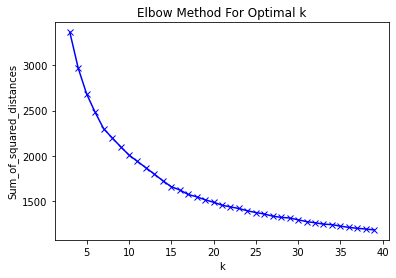

In [26]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Giá trị k sẽ tốt nếu chọn trong khoảng 10-15, ở đây sẽ chọn `k = 13`

In [27]:
kmeans = KMeans(n_clusters = 13)
kmeans.fit(scaled_pd_full_test)

KMeans(n_clusters=13)

In [28]:
label = kmeans.labels_
pd_full_test_copy['cluster_label'] = label

In [29]:
pd_full_test_copy

,track_duration,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster_label
0,141805,100,0.591,0.764,1,-5.484,1,0.0483,0.038300,0.000000,0.1030,0.478,169.928,4,7
1,212000,97,0.736,0.704,3,-7.409,0,0.0615,0.020300,0.000000,0.0501,0.894,149.995,4,4
2,210560,92,0.664,0.609,1,-6.509,1,0.0707,0.304000,0.000000,0.0926,0.194,130.041,4,7
3,231041,98,0.808,0.897,11,-3.712,0,0.0348,0.046900,0.000031,0.3640,0.591,126.026,4,11
4,211560,99,0.714,0.800,11,-4.808,0,0.0504,0.127000,0.000000,0.3590,0.589,134.002,4,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5882,204912,0,0.582,0.750,6,-4.104,1,0.0362,0.089500,0.000042,0.0875,0.322,128.026,4,1
5883,162354,2,0.507,0.642,7,-6.171,1,0.0336,0.100000,0.000000,0.0754,0.636,125.010,4,1
5884,150769,0,0.526,0.915,8,-6.255,0,0.0390,0.259000,0.842000,0.0816,0.709,156.000,4,2
5885,295524,0,0.752,0.799,9,-5.868,0,0.0719,0.023500,0.177000,0.1390,0.544,132.017,4,2


## Với một playlist bất kỳ

`playlist_all_id_to_test` chứa tất cả các `playlist_id` của các playlist được chọn ra 

`playlist_id_to_test` là một `playlist_id` lấy ngẫu nhiên để kiểm tra

In [30]:
playlist_id_to_test = playlist_all_id_to_test[0]
playlist_id_to_test

'37i9dQZF1DWT6SJaitNDax'

In [31]:
all_name_songs = list(pd_full[pd_full['track_id'].isin(playlist_test_all_track[playlist_id_to_test])]['track_name'].values)
print('All song in playlist 0:', all_name_songs)

All song in playlist 0: ['Essence (feat. Justin Bieber & Tems)', 'Essence (feat. Justin Bieber & Tems)', 'Essence (feat. Justin Bieber & Tems)', 'System (feat. WizKid)', 'System (feat. WizKid)', 'The Jackie (with J. Cole & Lil Tjay)', 'Essence (feat. Justin Bieber & Tems)', 'System (feat. WizKid)', 'The Jackie (with J. Cole & Lil Tjay)', 'The Jackie (with J. Cole & Lil Tjay)', 'The Jackie (with J. Cole & Lil Tjay)', 'Essence (feat. Tems)', 'Bloody Samaritan', 'Oh My', 'Essence (feat. Justin Bieber & Tems)', 'Essence (feat. Justin Bieber & Tems)', 'System (feat. WizKid)', 'Dimension (feat. Skepta & Rema)', 'MOSLADO', 'Essence (feat. Justin Bieber & Tems)', 'System (feat. WizKid)', 'The Jackie (with J. Cole & Lil Tjay)', 'Dimension (feat. Skepta & Rema)', 'MOSLADO', 'Antidote (feat. Adekunle Gold)', 'Real Life (feat. Stormzy)', 'Godly', 'Love Somebody', 'Essence (feat. Tems)', 'Mandy', 'Ginger Me', 'Damn (feat. 6lack)', 'Slow Down (feat. Tion Wayne)', 'No Stress', 'D & G (feat. Summer Wa

In [32]:
given_name_songs = list(pd_full[pd_full['track_id'].isin(playlist_to_test[playlist_id_to_test])]['track_name'].values)
print('Given in playlist 0 : ', given_name_songs)

Given in playlist 0 :  ['Essence (feat. Justin Bieber & Tems)', 'Essence (feat. Justin Bieber & Tems)', 'Essence (feat. Justin Bieber & Tems)', 'System (feat. WizKid)', 'System (feat. WizKid)', 'The Jackie (with J. Cole & Lil Tjay)', 'Essence (feat. Justin Bieber & Tems)', 'System (feat. WizKid)', 'The Jackie (with J. Cole & Lil Tjay)', 'The Jackie (with J. Cole & Lil Tjay)', 'The Jackie (with J. Cole & Lil Tjay)', 'Essence (feat. Tems)', 'Bloody Samaritan', 'Oh My', 'Essence (feat. Justin Bieber & Tems)', 'Essence (feat. Justin Bieber & Tems)', 'System (feat. WizKid)', 'Dimension (feat. Skepta & Rema)', 'MOSLADO', 'Essence (feat. Justin Bieber & Tems)', 'System (feat. WizKid)', 'The Jackie (with J. Cole & Lil Tjay)', 'Dimension (feat. Skepta & Rema)', 'MOSLADO', 'Antidote (feat. Adekunle Gold)', 'Real Life (feat. Stormzy)', 'Godly', 'Love Somebody', 'Essence (feat. Tems)', 'Mandy', 'Ginger Me', 'Damn (feat. 6lack)', 'Slow Down (feat. Tion Wayne)', 'No Stress', 'D & G (feat. Summer Wal

`pid` để lưu lại (các) `playlist_id` mà tại đó các `track_id` được cho xuất hiện nhiều nhất

`most_cluster` để lưu lại label mà tại đó có nhiều track nhất trong `all_name_songs` thuộc về label đó

việc tiếp theo chỉ là lấy ra các bài hát thuộc label đó trong `pd_full_test` mà khác các track được cho trước

In [33]:
import collections
def recommend_songs(given_playlist_track, df_scaled_features, info_df, n_pred, num_clusters = 13, random_state = 42):
    pid = list(info_df[info_df['track_id'].isin(given_playlist_track)]['playlist_id'].value_counts().index)[0]
    df_features = pd.DataFrame(df_scaled_features.copy())
    
    kmeans = KMeans(n_clusters = num_clusters, random_state = random_state)
    kmeans.fit(df_features)
    label = kmeans.labels_
    df_features['cluster_label'] = label
    
    most_cluster = list(df_features[info_df['playlist_id'] == pid]['cluster_label'].value_counts().index)[0]
    
    same_cluster_track_df = info_df[~(info_df['track_id'].isin(given_playlist_track)) & (df_features['cluster_label'] == most_cluster)]
    same_cluster_track_df = same_cluster_track_df.sort_values(by = 'popularity', ascending=False)
    
    result = []
    recs_names = list(np.unique(same_cluster_track_df['track_name'].values))
    preds = collections.Counter(recs_names).most_common(n_pred)
    for pred in preds:
        result.append(pred[0])
    
    return result

In [34]:
recommended_songs = recommend_songs(given_playlist_track = playlist_to_test[playlist_id_to_test], 
                                    df_scaled_features = scaled_pd_full_test, 
                                    info_df = pd_full_test, 
                                    n_pred = len(playlist_test_all_track[playlist_id_to_test])-len(playlist_to_test[playlist_id_to_test]))

In [35]:
print(recommended_songs)

['#1 Crush', "(Don't Fear) The Reaper", '(I\'ve Had) The Time of My Life - From "Dirty Dancing" Soundtrack', "03' Bonnie & Clyde", '18', '2055', '21 Questions', '4EVER', '6000 Ft.', '99 Problems', 'A Ghost', 'A Milli', 'A.D.A.M', 'AM', 'Adicto (with Anuel AA & Ozuna)', 'Adore You (feat. PnB Rock)', 'Adore You - Remix', "Ain't It Funny - Murder Remix", 'Ali Bomaye', 'All Along the Watchtower - Live At Piedmont Park, Atlanta, GA - September 2007']


## Đánh giá mô hình đối với các playlist được sinh ra

In [36]:
class ColDropper(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.columns_to_drop = ['playlist_id', 'track_id',
                                'track_name', 'artist_ids',
                                'artist_names', 'album_id',
                                'album_name', 'playlist_num_tracks',
                                'playlist_num_followers']
    def fit(self, X_df):
        return self
    
    def transform(self, X_df):
        result  = X_df.copy()
        result = result.drop(columns = self.columns_to_drop)
        return result

In [37]:
# preprocess_pipeline = make_pipeline(ColDropper(), MinMaxScaler())
# preprocess_pipeline

In [38]:
# full_pipeline = make_pipeline(preprocess_pipeline, KMeans)
# full_pipeline

In [39]:
# a = preprocess_pipeline.fit_transform(X = pd_full)

In [40]:
def test_multi(pd_playlist, pd_full, missing_rate = 0.2, nums_playlists_test = 100):
    r_score = []
    
    playlist_test_all_track = generate_playlist(pd_full, pd_playlist, num_playlist_to_test = nums_playlists_test)
    playlist_to_test = generate_test_playlist(playlist_test_all_track, missing_rate = missing_rate)
    
    all_playlistID_for_tests = list(playlist_to_test.keys())
    
    pd_full_tests = pd_full.copy()
    pd_full_tests = pd_full_tests[pd_full_tests['playlist_id'].isin(all_playlistID_for_tests)]
    pd_full_tests = pd_full_tests.reset_index(drop = True)
    
    

    # Bỏ vô pipeline###################################
    #     pd_full_test_input = preprocess_pipeline.transform(X = pd_full_tests)
    pd_full_tests_copy = pd_full_tests.copy()
    columns_to_drop = ['playlist_id', 'track_id', 'track_name', 
                       'artist_ids', 'artist_names',
                       'album_id', 'album_name', 
                       'playlist_num_tracks', 'playlist_num_followers']
    pd_full_tests_copy = pd_full_tests_copy.drop(columns_to_drop, axis = 1)
    scaler = MinMaxScaler()
    scaler.fit(pd_full_tests_copy)
    pd_full_test_input = scaler.transform(pd_full_tests_copy)
    
    
    ####################################################
    recommended_songs_all_playlist = {}
    
    for each_playlist in all_playlistID_for_tests:
        recommended_songs = recommend_songs(playlist_to_test[each_playlist], 
                                            pd_full_test_input, 
                                            pd_full_tests, 
                                            len(playlist_test_all_track[each_playlist])-len(playlist_to_test[each_playlist]))
        recommended_songs_all_playlist[each_playlist] = recommended_songs
        all_name_songs = list(pd_full[pd_full['track_id'].isin(playlist_test_all_track[each_playlist])]['track_name'].values)
        given_name_songs = list(pd_full[pd_full['track_id'].isin(playlist_to_test[each_playlist])]['track_name'].values)
        songs_need_to_recommend = [song for song in all_name_songs if song not in given_name_songs]
#         print(all_name_songs)
#         print(given_name_songs)
#         print(len(songs_need_to_recommend))
#         print(songs_need_to_recommend)
        r_score.append(r_precision(recommended_songs, songs_need_to_recommend))
    return r_score

In [41]:
r_score = test_multi(pd_playlist, pd_full, missing_rate = 0.2, nums_playlists_test = 100)


In [42]:
missing_rates = np.arange(0.1, 1, 0.1)
for missing_rate in missing_rates:
    r_score = test_multi(pd_playlist, pd_full, missing_rate = missing_rate, nums_playlists_test = 100)
    print('*'*50)
    print('Mising rate = ', missing_rate)
    print('Average R-Precision', np.array(r_score).mean())
    print('Max R-Precision', np.array(r_score).max())
    print('*'*50)

**************************************************
Mising rate =  0.1
Average R-Precision 0.0058823529411764705
Max R-Precision 0.2
**************************************************
**************************************************
Mising rate =  0.2
Average R-Precision 0.01223669623059867
Max R-Precision 0.4
**************************************************
**************************************************
Mising rate =  0.30000000000000004
Average R-Precision 0.017250126585941633
Max R-Precision 0.23333333333333334
**************************************************
**************************************************
Mising rate =  0.4
Average R-Precision 0.022298806312213884
Max R-Precision 0.13333333333333333
**************************************************
**************************************************
Mising rate =  0.5
Average R-Precision 0.03310889848093784
Max R-Precision 0.32
**************************************************
******************************************

In [ ]:
for nums_playlists_test in range (100, 1000, 100):
    r_score = test_multi(pd_playlist, pd_full, missing_rate = 0.8 , nums_playlists_test = nums_playlists_test)
    print('*'*50)
    print('Number of playlist to cluster = ', nums_playlists_test)
    print('Average R-Precision', np.array(r_score).mean())
    print('Max R-Precision', np.array(r_score).max())
    print('*'*50)

**************************************************
Number of playlist to cluster =  100
Average R-Precision 0.04628314889499768
Max R-Precision 0.2625
**************************************************
**************************************************
Number of playlist to cluster =  200
Average R-Precision 0.025740886706893153
Max R-Precision 0.16981132075471697
**************************************************
**************************************************
Number of playlist to cluster =  300
Average R-Precision 0.01652680067650966
Max R-Precision 0.4875
**************************************************
**************************************************
Number of playlist to cluster =  400
Average R-Precision 0.014454944526672535
Max R-Precision 0.3
**************************************************


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_fast._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 2, in where
KeyboardInterrupt: 
